# **Minor** **Project**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Load the dataset
data = pd.read_csv('/content/weather_classification_data.csv')
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(["object"]).columns.tolist()
numerical_cols = data.select_dtypes(["int64","float64"]).columns.tolist()

# Handling missing values
# categorical_cols --> mode
data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# numerical_cols --> mean
data[numerical_cols].fillna(data[numerical_cols].median())

# Check for remaining missing values
data.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [ ]:
print(categorical_cols)
print(numerical_cols)

['Cloud Cover', 'Season', 'Location', 'Weather Type']
['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


# **Exploratory Data Analysis**

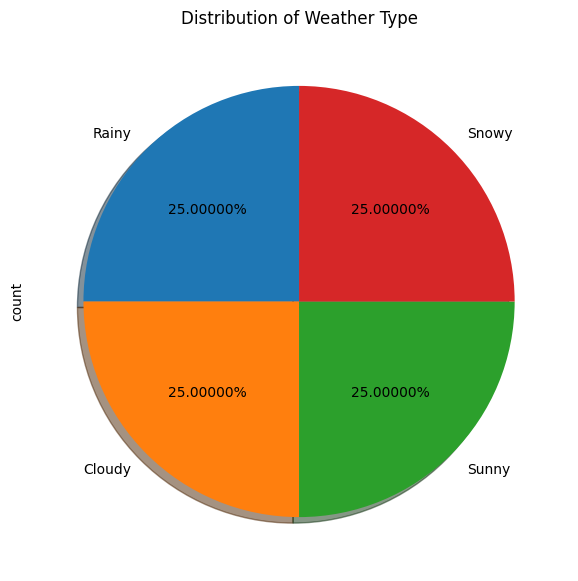

In [ ]:
# Pie chart to visualize distribution of Weather Type

product_lines = data['Weather Type'].value_counts()
plt.figure(figsize=(7, 7))
product_lines.plot(kind='pie', autopct='%1.5f%%', startangle=90, shadow=True)
plt.title('Distribution of Weather Type')
plt.show()

<Axes: >

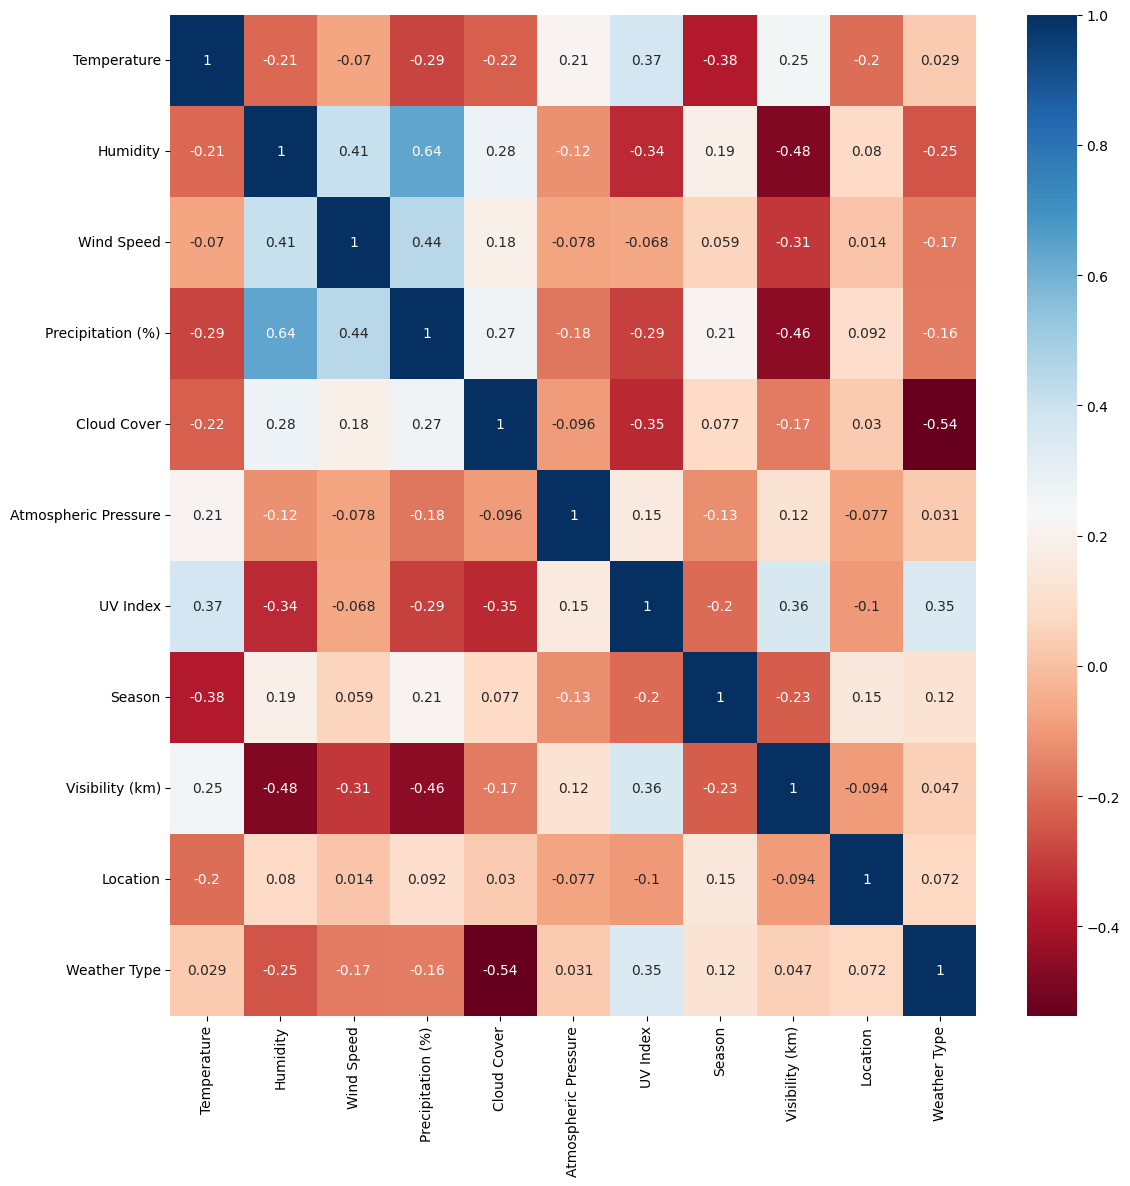

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(), cmap="RdBu", annot=True)

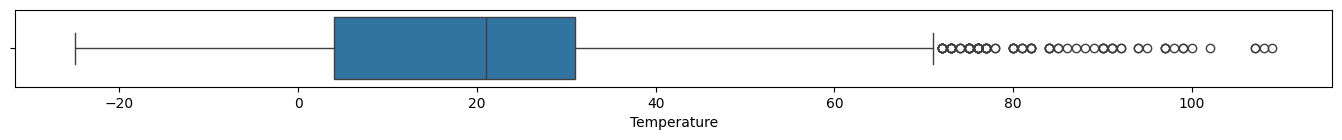

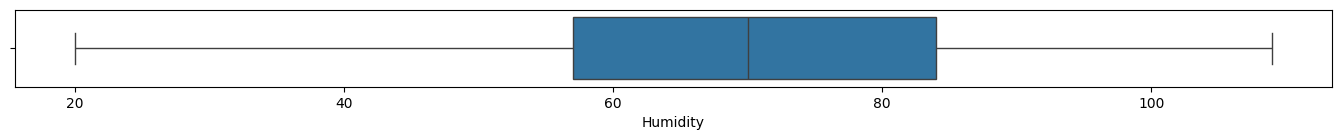

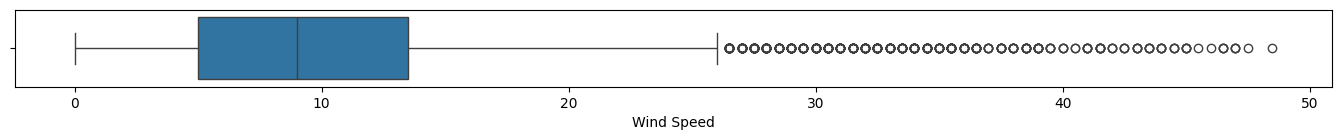

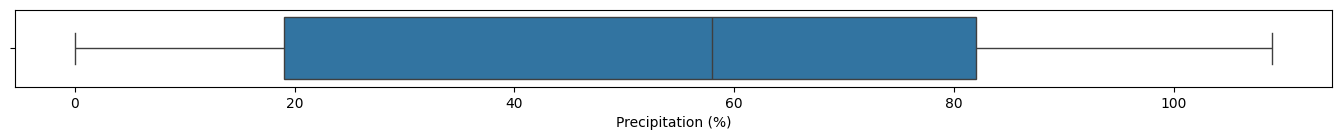

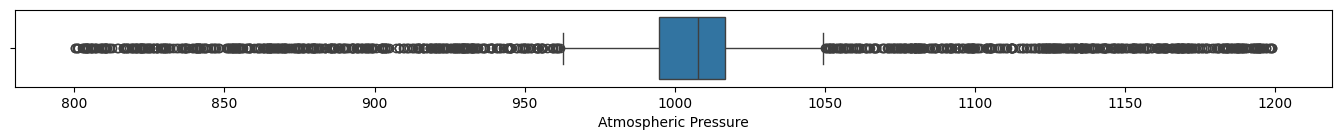

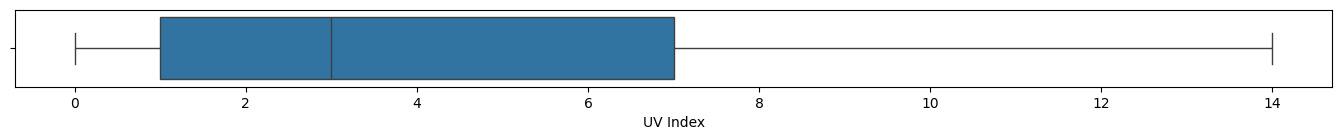

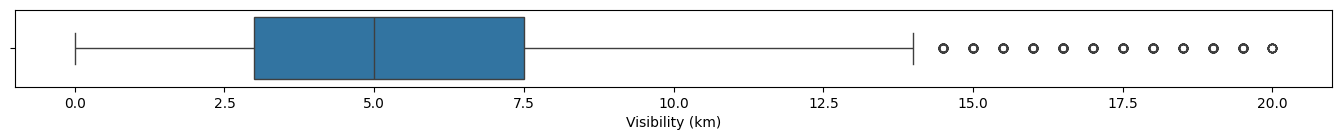

In [ ]:
for column in numerical_cols:
      plt.figure(figsize=(17,1))
      sns.boxplot(data=data, x=column)

<Axes: xlabel='Weather Type', ylabel='count'>

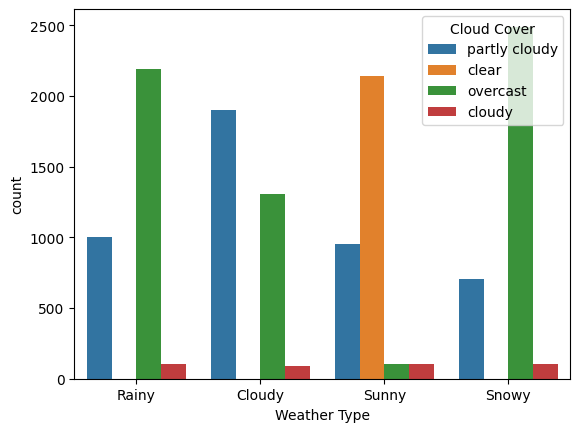

In [ ]:
sns.countplot(data = data, x = "Weather Type", hue = "Cloud Cover")

<Axes: xlabel='Weather Type', ylabel='count'>

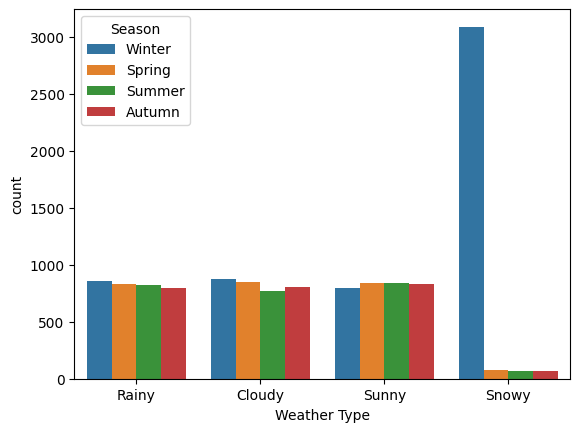

In [ ]:
sns.countplot(data = data, x = "Weather Type", hue = "Season")

<Axes: xlabel='Weather Type', ylabel='count'>

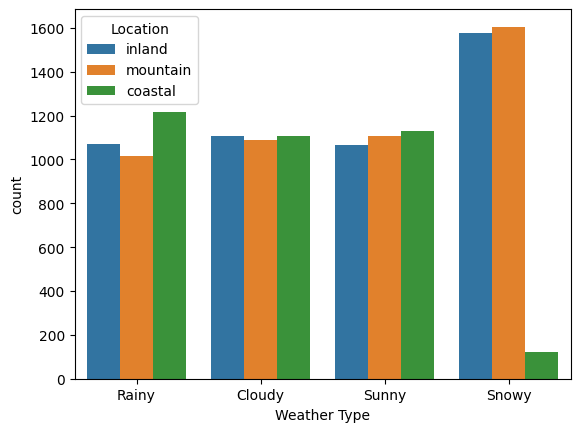

In [ ]:
sns.countplot(data = data, x = "Weather Type", hue = "Location")

Text(0, 0.5, 'Temperature')

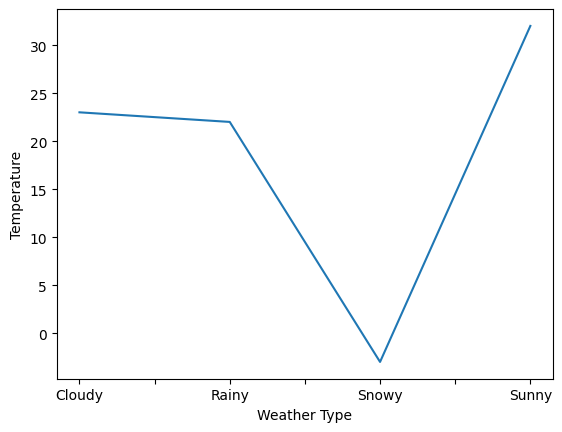

In [ ]:
# Feature-wise median values grouped by Weather Type
data.groupby("Weather Type")["Temperature"].median().plot()
plt.ylabel("Temperature")

Text(0, 0.5, 'Humidity')

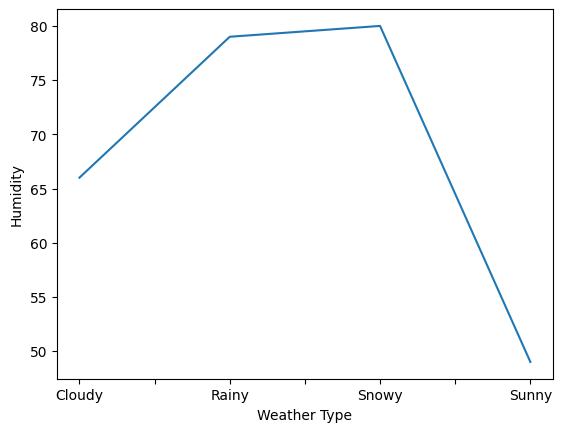

In [ ]:
data.groupby("Weather Type")["Humidity"].median().plot()
plt.ylabel("Humidity")

Text(0, 0.5, 'Wind Speed')

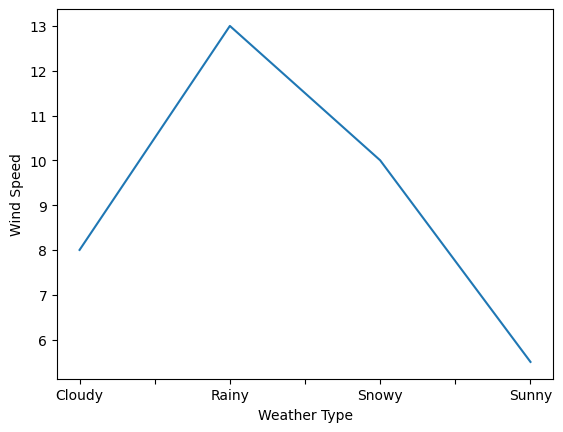

In [ ]:
data.groupby("Weather Type")["Wind Speed"].median().plot()
plt.ylabel("Wind Speed")

Text(0, 0.5, 'Precipitation (%)')

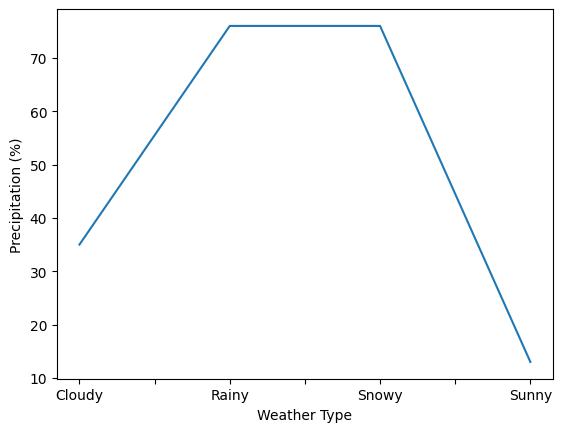

In [ ]:
data.groupby("Weather Type")["Precipitation (%)"].median().plot()
plt.ylabel("Precipitation (%)")

Text(0, 0.5, 'Atmospheric Pressure')

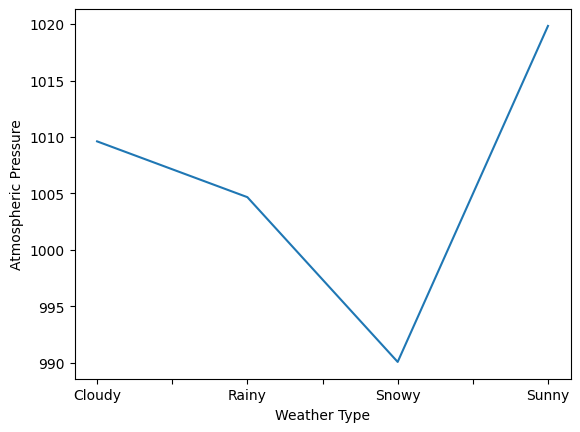

In [ ]:
data.groupby("Weather Type")['Atmospheric Pressure'].median().plot()
plt.ylabel('Atmospheric Pressure')

Text(0, 0.5, 'UV Index')

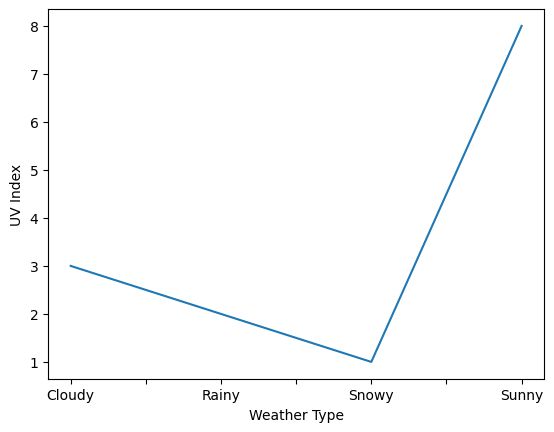

In [ ]:
data.groupby("Weather Type")['UV Index'].median().plot()
plt.ylabel('UV Index')

Text(0, 0.5, 'Visibility (km)')

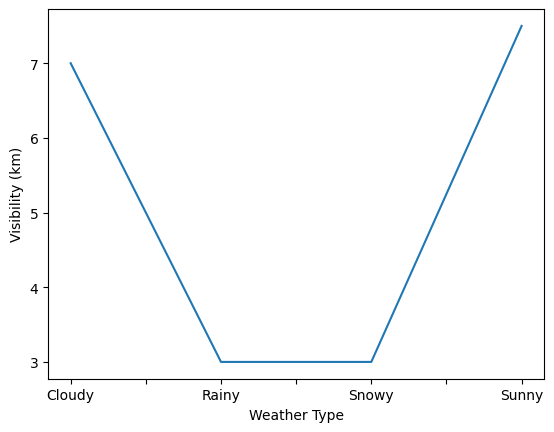

In [ ]:
data.groupby("Weather Type")['Visibility (km)'].median().plot()
plt.ylabel('Visibility (km)')

<Axes: xlabel='Weather Type', ylabel='UV Index'>

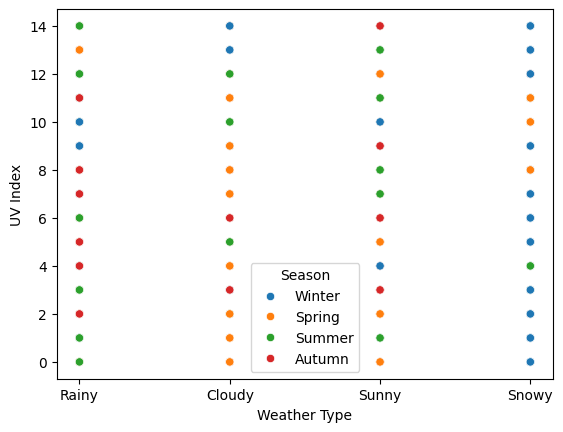

In [ ]:
# Scatter plot to analyze correlation between features and Weather Type
sns.scatterplot(data = data, x = "Weather Type", y = 'UV Index', hue = "Season")

Summarisation of Analysis and Observarions

In [ ]:
# Monsoon months have more precipitation and humidity, whereas Summer has clear skies and high UV Index levels.
# Outliers are present in numerical features like Temperature, Wind Speed, and Precipitation, as seen in the box plots. For example, Wind Speed goes over 30 km/h in some cases.
# Lower Atmospheric Pressure often leads to more Precipitation.
# High Temperature, Humidity, and Precipitation increase the chance of storms or fog.
# it is seen that with increase in Humidity, Precipitation also increases and vica-versa.
# Low UV Index and Visibility are seen in rainy and cloudy weather.

# **Classification**

Split Dataset for Training and Testing

In [ ]:
# Encode categorical columns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])

data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [ ]:
# Splitting dataset into features and target
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.72798445, -0.129706  , -0.5536792 , ..., -0.72244736,
        -1.17954402, -0.11088224],
       [-0.2483393 ,  1.35248791,  0.17067625, ..., -1.57906584,
        -0.4360718 ,  1.14952303],
       [ 0.49826122, -0.52495771, -0.48124366, ...,  0.13417111,
         1.05087263, -0.11088224],
       ...,
       [ 0.84284607, -0.82139649, -0.40880811, ...,  0.13417111,
         0.75348375, -1.37128752],
       [-0.59292416,  0.21613924,  0.02580516, ..., -0.72244736,
         0.75348375,  1.14952303],
       [-0.47806254,  1.30308144, -0.62611475, ..., -1.57906584,
        -0.4360718 , -1.37128752]])

In [ ]:
results = {}

### Logistic Regression

Accuracy of logical regression on test dataset :84.85


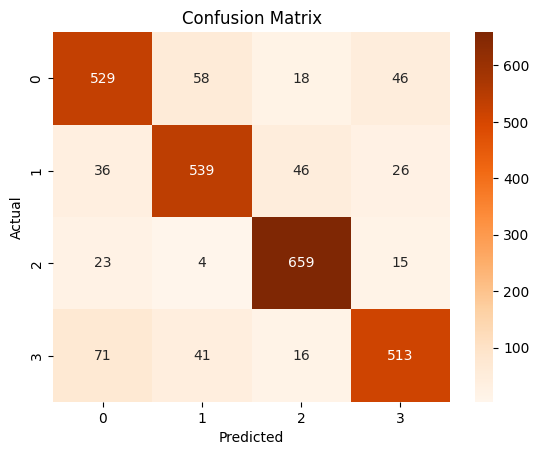

In [ ]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)

y_pred_lr = lr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_lr)

print(f"Accuracy of logical regression on test dataset :{round(accuracy*100,2)}")
results["Logistic Regression"] = accuracy

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### K - Nearest Neighbors (KNN)

Accuracy of KNN model on test dataset :89.2


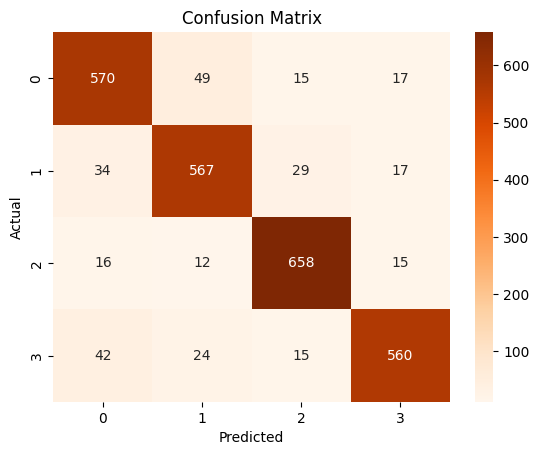

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, y_train)
y_pred_knn=knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of KNN model on test dataset :{round(accuracy*100,2)}")
results["K-Nearest Neighbors (KNN)"] = accuracy

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Support Vector Machine

Accuracy of SVM model on test dataset :90.68


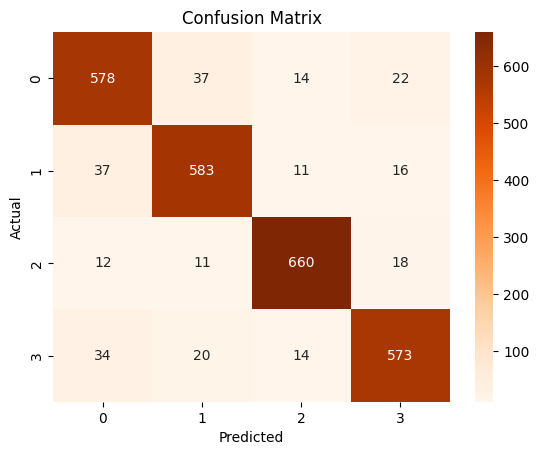

In [ ]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy of SVM model on test dataset :{round(accuracy*100,2)}")
results["Support Vector Machine (SVM)"] = accuracy

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Naive Bayes

Accuracy of Naive Bayes on test dataset :86.29


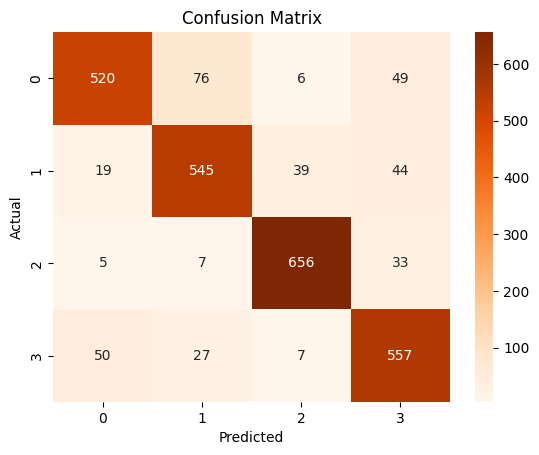

In [ ]:
nb=GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Naive Bayes on test dataset :{round(accuracy*100,2)}")
results["Naive Bayes"] = accuracy

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Tree

Accuracy of Decision Tree on test dataset :90.8


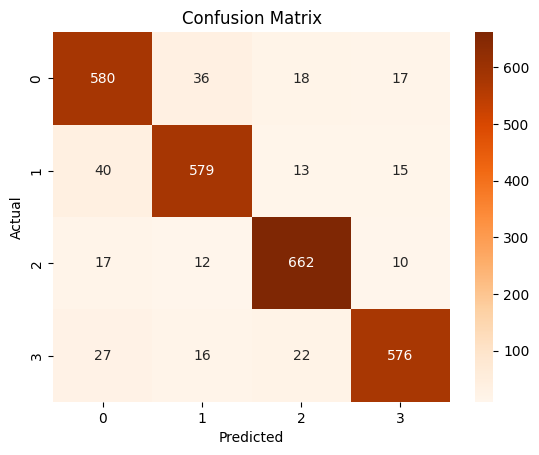

In [ ]:
dt = DecisionTreeClassifier ()
dt.fit(X_train, y_train)
y_pred_dt =dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)

print(f"Accuracy of Decision Tree on test dataset :{round(accuracy*100,2)}")
results["Decision Tree"] = accuracy

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Random Forest

Accuracy of Random Forest on test dataset :91.28787878787878


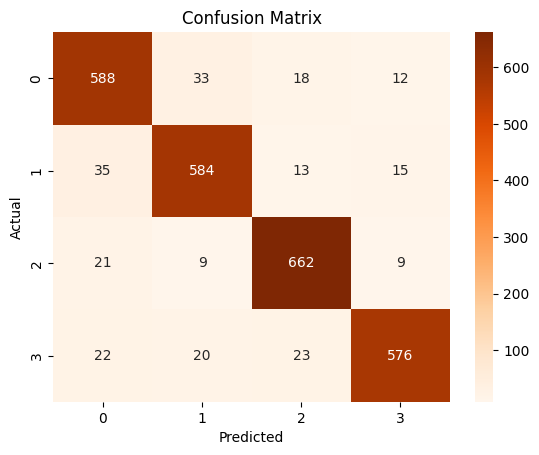

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf =rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy of Random Forest on test dataset :{accuracy*100}")
results["Random Forest"] = accuracy

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Hyperparameter Tuning

In [ ]:
param_grid_rf = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    "max_depth": [None, 10, 20, 30],  # Depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split
    "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
    "max_features": ["sqrt", "log2", None],  # Number of features to consider at each split
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score for Random Forest: 0.9172348484848485


Accuracy of Tuned Random Forest model: 91.21212121212122


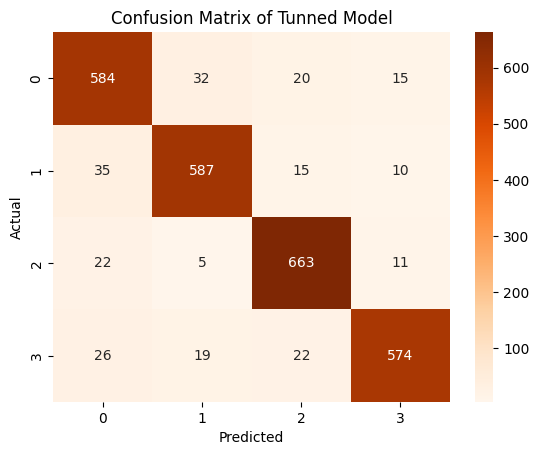

In [ ]:
rf_best_model = grid_search_rf.best_estimator_

y_tuned_rf = rf_best_model.predict(X_test)

print("Accuracy of Tuned Random Forest model:", accuracy_score(y_test, y_tuned_rf)*100)

sns.heatmap(confusion_matrix(y_test, y_tuned_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix of Tunned Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Result

In [ ]:
# Summary of model accuracies
print("Model Accuracies:")

for model_name, accuracy in results.items():
  print(model_name,":",round(accuracy*100,2))

Model Accuracies:
Logistic Regression : 84.85
K-Nearest Neighbors (KNN) : 89.2
Support Vector Machine (SVM) : 90.68
Naive Bayes : 86.29
Decision Tree : 90.8
Random Forest : 91.29
